# Смотрим на данные

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
ratings = pd.read_csv('/content/drive/My Drive/qe/BX-Book-Ratings.csv', sep=';', decimal = ',', 
                      quotechar='"', encoding = 'cp1251', comment = "'")
print(ratings.shape)
ratings.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [286]:
books = pd.read_csv('/content/drive/My Drive/qe/BX-Books.csv', sep=';', decimal = ',', error_bad_lines=False,
                      quotechar='"', encoding = 'cp1251', comment = "'")
print(books.shape)
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


(271360, 8)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [14]:
books.isnull().sum()

ISBN                     0
Book-Title               0
Book-Author            101
Year-Of-Publication    100
Publisher              102
Image-URL-S            100
Image-URL-M            100
Image-URL-L            103
dtype: int64

In [15]:
user = pd.read_csv('/content/drive/My Drive/qe/BX-Users.csv', sep=';', quotechar='"', encoding = 'cp1251')
print(user.shape)
user.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [16]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Кол-во оценок самого активного пользователя - 13602
Среднее кол-во оценок на пользователя - 10.920851419507423
Медианное кол-во оценок на пользователя - 1.0


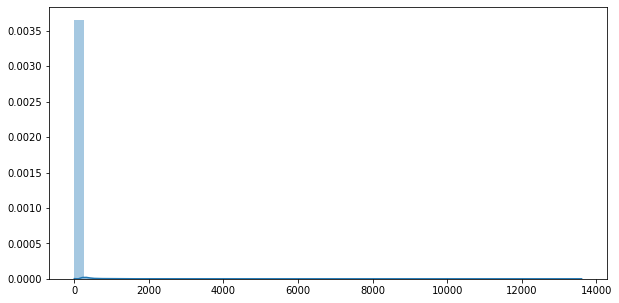

In [17]:
#Распределение числа пользователей по количеству взаимодействий

idcount = ratings['User-ID'].value_counts()
plt.figure(figsize=(10,5))
sns.distplot(idcount.values)

print("Кол-во оценок самого активного пользователя -", max(idcount.values))
print("Среднее кол-во оценок на пользователя -", np.mean(idcount.values))
print("Медианное кол-во оценок на пользователя -", np.median(idcount.values))
#print( -", np.median(idcount.values))

Подавляющее число пользователей поставило оценку всего 1 раз.

Средний указанный возраст - 34.75143370454978


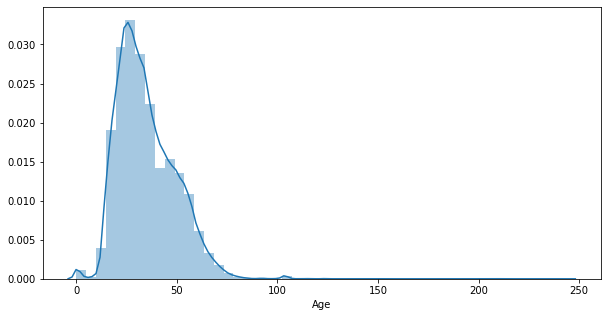

In [18]:
#Распределение пользователей по возрасту

plt.figure(figsize=(10,5))
sns.distplot(user['Age'])

print("Средний указанный возраст -", np.mean(user['Age']))

Из-за длинного хвоста можно предположить, что при регистрации не было ограничения по возрасту.

Книга с наибольшим числом взаимодействий - Wild Animus
Среднее кол-во оценок на книгу - 3.376184827164989
Медианное кол-во оценок на книгу - 1.0


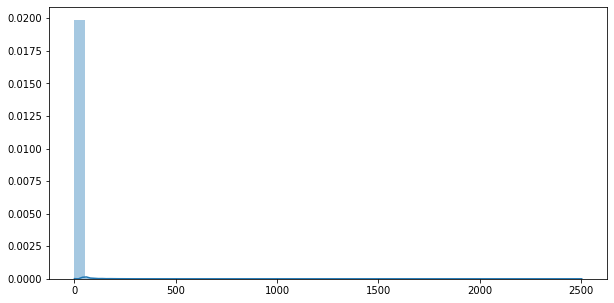

In [19]:
#Распределение числа книг по количеству взаимодействий

iscount = ratings['ISBN'].value_counts()
plt.figure(figsize=(10,5))
sns.distplot(iscount.values)

pop_book = books[books['ISBN'] == iscount.index[0]]
print("Книга с наибольшим числом взаимодействий -", pop_book.iloc[0]['Book-Title'])
print("Среднее кол-во оценок на книгу -", np.mean(iscount.values))
print("Медианное кол-во оценок на книгу -", np.median(iscount.values))

У большинства оцененных книг лишь одна оценка.

In [305]:
#Посмотрим, все ли книги были оценены

rated_books = []
for i in ratings['ISBN']:
  rated_books.append(i)

un_rated_books = list(set(rated_books))
print('Уникальных книг в ratings - ', len(un_rated_books))
print('Уникальных книг в books - ',books.shape[0])

Уникальных книг в ratings -  340556
Уникальных книг в books -  271360


Видно несоответствие, было оценено уникальных книг 340556, а всего мы имеем 271360

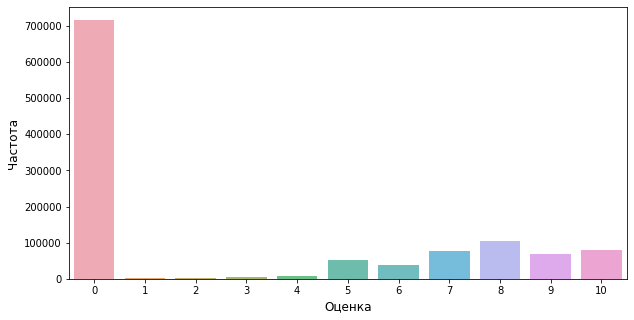

In [22]:
#Посмотрим как распределены оценки

rcount = ratings['Book-Rating'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(rcount.index, rcount.values, alpha=0.8)
plt.ylabel('Частота', fontsize=12)
plt.xlabel('Оценка', fontsize=12)
plt.show()

Подавляющее большинство пользователей решило отказаться от оценки (0). Самой популярной оказалась оценка 8, а низкие значения (от 1 до 4) ставили редко.

In [306]:
rated_ratings = ratings[ratings['Book-Rating'] != 0] #Убираем все нулевые оценки

print('Средняя оценка', np.mean(rated_ratings['Book-Rating']))
print('Медианная оценка', np.median(rated_ratings['Book-Rating']))

Средняя оценка 7.601066246071331
Медианная оценка 8.0


# Найдем самые популярные книги


In [307]:
# Выведем 5 самых часто оцениваемых книг и их рейтинг

book_rating = pd.DataFrame(rated_ratings.groupby('ISBN')['Book-Rating'].mean())
book_rating['ratingCount'] = pd.DataFrame(rated_ratings.groupby('ISBN')['Book-Rating'].count()) #Кол-во оценок
book_rating['watchedCount'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count()) # Тоже что и ratingCount, только еще и нули
book_rating = book_rating.sort_values('watchedCount', ascending=False)

book_rating.head()

,Book-Rating,ratingCount,watchedCount
ISBN,,,
0971880107,4.390706,581,2502
0316666343,8.185290,707,1295
0385504209,8.435318,487,883
0060928336,7.887500,320,732
0312195516,8.182768,383,723


In [308]:
#Создадим выборку по книгам с более чем 100 оценок для статистической значимости

pop_book_rating = book_rating[book_rating['ratingCount'] > 100]
pop_book_rating.shape

(137, 3)

In [309]:
#Выведем 5 наиболее высоко оцененных книг

Pop_book_rating = pd.merge(pop_book_rating, books, on='ISBN')

Pop_book_rating.sort_values('Book-Rating', ascending=False).head()

,ISBN,Book-Rating,ratingCount,watchedCount,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128,0439139597,9.262774,137,194,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
118,0439136369,9.082707,133,226,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
126,0439136350,9.035461,141,197,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
67,043935806X,9.033981,206,334,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
135,0590353403,8.983193,119,168,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...


In [292]:
# Выведем 5 книг с наибольшим числом взаимодействий

Pop_book_rating.sort_values('watchedCount', ascending=False).head()

,ISBN,Book-Rating,ratingCount,watchedCount,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,4.390706,581,2502,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,8.185290,707,1295,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,8.435318,487,883,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,7.887500,320,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,8.182768,383,723,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


# FM


In [0]:
#Сделаем выбрку по активным пользователям

usercount = rated_ratings['User-ID'].value_counts()
usercdict = {'User-ID':usercount.index, 'UserCount':usercount.values}
act_user = pd.DataFrame(usercdict)
act_user = act_user[act_user['UserCount'] >= 100]

In [76]:
#Сделаем выборку по активным пользователям и попуялрным книгам

rated_r_p = rated_ratings[rated_ratings['User-ID'].isin(act_user['User-ID'])]
#Фильтрация по активности пользователей оказалась бесполезной, сильно сократили выборку по книгам.

rated_r_p = rated_ratings[rated_ratings['ISBN'].isin(Pop_book_rating['ISBN'])]

rated_r_p.shape

(22868, 3)

In [152]:
#Стандартизация рейтинга

from sklearn.preprocessing import scale

scaled_r = scale(rated_r_p['Book-Rating'])
rated_r_p['scaled_r'] = scaled_r

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [153]:
rated_r_p.head()

,User-ID,ISBN,Book-Rating,scaled_r
84,276788,043935806X,7,-0.467905
429,276925,0385504209,8,0.078100
648,276953,0446310786,10,1.170109
676,276957,0312966970,6,-1.013910
691,276964,0440220602,9,0.624104


In [159]:
#Посмотрим таблицу рейтингов

rating_t = rated_r_p.pivot(
    index='User-ID',
    columns='ISBN',
    values='scaled_r' #Используем стандартизованное значение, т.к неоцененные фильмы будем отмечать 0, который в данным случае будет средним значением.
).fillna(0)

rating_t.head()

ISBN,0060392452,0060502258,0060915544,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060987103,0061009059,006101351X,0062502182,0064407667,0140067477,014028009X,0140293248,0140298479,0142000205,0142001740,0156027321,0312195516,0312278586,0312291639,0312305060,0312924585,0312966970,0312983271,0316096199,0316284955,0316569321,0316601950,0316666343,0316769487,0316776963,0345313860,0345337662,0345339681,0345339703,0345342968,...,0446608955,0446610038,0446611867,0446612545,0446672211,0449005615,0449212602,0451524934,0452282152,0452282829,0515131229,0553279912,0553572997,0590353403,059035342X,0671001795,0671003755,0671021001,0671027360,0671510053,0679429220,0679746048,067976402X,0684801523,068484477X,0684872153,0684874350,0743237188,0743418174,0767902521,0786868716,0804106304,0804114986,0805063897,0812550706,0842329129,0971880107,1400034779,1558743669,1573229326
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.624104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624104,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.624104,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.170109,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.170109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#Включаем повторяющихся пользователей так, чтобы кол-во строк совпадало с rated_r_p

#rating_t['User-ID'] = rating_t.index
rating_t.index.rename('ID', inplace = True)
#user_index.rename('User-ID', inplace=True)
rating_t_big =  pd.merge(rating_t, rated_r_p, on='User-ID')

In [177]:
rating_t_big.head()

,0060392452,0060502258,0060915544,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060987103,0061009059,006101351X,0062502182,0064407667,0140067477,014028009X,0140293248,0140298479,0142000205,0142001740,0156027321,0312195516,0312278586,0312291639,0312305060,0312924585,0312966970,0312983271,0316096199,0316284955,0316569321,0316601950,0316666343,0316769487,0316776963,0345313860,0345337662,0345339681,0345339703,0345342968,...,0446672211,0449005615,0449212602,0451524934,0452282152,0452282829,0515131229,0553279912,0553572997,0590353403,059035342X,0671001795,0671003755,0671021001,0671027360,0671510053,0679429220,0679746048,067976402X,0684801523,068484477X,0684872153,0684874350,0743237188,0743418174,0767902521,0786868716,0804106304,0804114986,0805063897,0812550706,0842329129,0971880107,1400034779,1558743669,1573229326,User-ID,ISBN,Book-Rating,scaled_r
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.624104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,0446310786,10,1.170109
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.624104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,0449005615,9,0.624104
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51,0440225701,9,0.624104
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624104,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91,0316769487,9,0.624104
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.170109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114,0446612545,9,0.624104


In [0]:
from sklearn.model_selection import *
from sklearn.metrics import *

In [163]:
rated_r_p.shape

(22868, 4)

In [178]:
ratings_ohe = pd.get_dummies(rating_t_big, columns=['User-ID', 'ISBN'], dtype=np.bool_)
ratings_ohe.shape

(22868, 12837)

In [179]:
ratings_ohe.head()

,0060392452,0060502258,0060915544,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060987103,0061009059,006101351X,0062502182,0064407667,0140067477,014028009X,0140293248,0140298479,0142000205,0142001740,0156027321,0312195516,0312278586,0312291639,0312305060,0312924585,0312966970,0312983271,0316096199,0316284955,0316569321,0316601950,0316666343,0316769487,0316776963,0345313860,0345337662,0345339681,0345339703,0345342968,...,ISBN_0446608955,ISBN_0446610038,ISBN_0446611867,ISBN_0446612545,ISBN_0446672211,ISBN_0449005615,ISBN_0449212602,ISBN_0451524934,ISBN_0452282152,ISBN_0452282829,ISBN_0515131229,ISBN_0553279912,ISBN_0553572997,ISBN_0590353403,ISBN_059035342X,ISBN_0671001795,ISBN_0671003755,ISBN_0671021001,ISBN_0671027360,ISBN_0671510053,ISBN_0679429220,ISBN_0679746048,ISBN_067976402X,ISBN_0684801523,ISBN_068484477X,ISBN_0684872153,ISBN_0684874350,ISBN_0743237188,ISBN_0743418174,ISBN_0767902521,ISBN_0786868716,ISBN_0804106304,ISBN_0804114986,ISBN_0805063897,ISBN_0812550706,ISBN_0842329129,ISBN_0971880107,ISBN_1400034779,ISBN_1558743669,ISBN_1573229326
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624104,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
X_train, X_test, y_train, y_test = train_test_split(ratings_ohe.drop('Book-Rating', axis=1), ratings_ohe['Book-Rating'], test_size=0.33, random_state=230,
                                                    stratify=ratings_ohe['Book-Rating'])

In [183]:
X_train.head()

,0060392452,0060502258,0060915544,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060987103,0061009059,006101351X,0062502182,0064407667,0140067477,014028009X,0140293248,0140298479,0142000205,0142001740,0156027321,0312195516,0312278586,0312291639,0312305060,0312924585,0312966970,0312983271,0316096199,0316284955,0316569321,0316601950,0316666343,0316769487,0316776963,0345313860,0345337662,0345339681,0345339703,0345342968,...,ISBN_0446608955,ISBN_0446610038,ISBN_0446611867,ISBN_0446612545,ISBN_0446672211,ISBN_0449005615,ISBN_0449212602,ISBN_0451524934,ISBN_0452282152,ISBN_0452282829,ISBN_0515131229,ISBN_0553279912,ISBN_0553572997,ISBN_0590353403,ISBN_059035342X,ISBN_0671001795,ISBN_0671003755,ISBN_0671021001,ISBN_0671027360,ISBN_0671510053,ISBN_0679429220,ISBN_0679746048,ISBN_067976402X,ISBN_0684801523,ISBN_068484477X,ISBN_0684872153,ISBN_0684874350,ISBN_0743237188,ISBN_0743418174,ISBN_0767902521,ISBN_0786868716,ISBN_0804106304,ISBN_0804114986,ISBN_0805063897,ISBN_0812550706,ISBN_0842329129,ISBN_0971880107,ISBN_1400034779,ISBN_1558743669,ISBN_1573229326
18005,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
5571,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15152,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14430,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4082,0.0,0.0,0.0,0.0781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [98]:
import pywFM
import os

!git clone https://github.com/srendle/libfm /home/libfm
! cd /home/libfm/ && git reset --hard 91f8504a15120ef6815d6e10cc7dee42eebaab0f
! cd /home/libfm/ && make all
os.environ['LIBFM_PATH'] = "/home/libfm/bin/"

Cloning into '/home/libfm'...
remote: Enumerating objects: 233, done.
remote: Total 233 (delta 0), reused 0 (delta 0), pack-reused 233
Receiving objects: 100% (233/233), 129.46 KiB | 610.00 KiB/s, done.
Resolving deltas: 100% (112/112), done.
HEAD is now at 91f8504 moved math.h below isinf so that Windows make works
cd src/libfm; make all
make[1]: Entering directory '/home/libfm/src/libfm'
g++ -O3 -Wall -c libfm.cpp -o libfm.o
mkdir -p ../../bin/
g++ -O3 -Wall libfm.o -o ../../bin/libFM
g++ -O3 -Wall -c tools/transpose.cpp -o tools/transpose.o
mkdir -p ../../bin/
g++ -O3 tools/transpose.o -o ../../bin/transpose
g++ -O3 -Wall -c tools/convert.cpp -o tools/convert.o
mkdir -p ../../bin/
g++ -O3 tools/convert.o -o ../../bin/convert
make[1]: Leaving directory '/home/libfm/src/libfm'


In [0]:
fm = pywFM.FM(task='regression', num_iter=5)

model = fm.run(X_train, y_train, X_test, y_test)

In [182]:
print('MAE =', mean_absolute_error(y_true=y_test, y_pred=model.predictions))
print('MSE =', mean_squared_error(y_true=y_test, y_pred=model.predictions))
print('R^2 =', r2_score(y_true=y_test, y_pred=model.predictions))

MAE = 0.1355551305154366
MSE = 0.032210325244481246
R^2 = 0.990400814729537


Возможно слишком высокая точноть из-за того, что значение таргета в стандартизованной форме есть среди фичей.

In [0]:
pred_fm = pd.DataFrame({'pred_score': model.predictions,
                     'act_score': y_test})
user_cols = [c for c in X_test.columns if c.startswith('User')]
user_index = X_test[user_cols].idxmax(1)
user_index.rename('User-ID', inplace=True)
pred_fm = pd.concat((user_index, pred_fm), axis=1)

In [186]:
pred_fm.head()

,User-ID,pred_score,act_score
19044,User-ID_232131,7.95866,8
1310,User-ID_16009,6.22542,6
17557,User-ID_215388,9.93336,10
4110,User-ID_46898,7.96542,8
8423,User-ID_101744,5.07356,5


С рекомендациями возникла проблема, по идее если сделать вектор, как в X_train для каждой комбинации пользователя/книги, то можно будет что-то порекомендовать, но не особо получилось

In [234]:
rated_r_p.head()

,User-ID,ISBN,Book-Rating,scaled_r
84,276788,043935806X,7,-0.467905
429,276925,0385504209,8,0.078100
648,276953,0446310786,10,1.170109
676,276957,0312966970,6,-1.013910
691,276964,0440220602,9,0.624104


# Content-Based

Будем рекомендовать похожие по заголовку книги

In [0]:
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
indices = pd.Series(Pop_book_rating.index, index = Pop_book_rating['Book-Title'])

In [0]:
#Переводим в нижний регистр

Pop_book_rating['Book-Title'] = Pop_book_rating['Book-Title'].astype(str)
lower_title = []
for s in Pop_book_rating['Book-Title']:
    lower_title.append(s.lower())

Pop_book_rating['Book-Title'] = lower_title

In [0]:
#Удаляем символы

Pop_book_rating['Book-Title'] = Pop_book_rating['Book-Title'].astype(str)
Pop_book_rating['Book-Title'] = Pop_book_rating['Book-Title'].apply(lambda x: re.sub('[!@#$;:%-&?<>*)(=_*/+}{|.,]','',x))
Pop_book_rating['Book-Title'] = Pop_book_rating['Book-Title'].apply(lambda x: re.sub('\d+','',x))

In [0]:
#tf-idf

tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(Pop_book_rating['Book-Title'])

In [298]:
Pop_book_rating.head()

,ISBN,Book-Rating,ratingCount,watchedCount,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,4.390706,581,2502,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,8.185290,707,1295,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,8.435318,487,883,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,7.887500,320,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,8.182768,383,723,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


In [329]:
indices

Book-Title
wild animus                                         0
the lovely bones a novel                            1
the da vinci code                                   2
divine secrets of the ya-ya sisterhood a novel      3
the red tent bestselling backlist                   4
                                                 ... 
the tao of pooh                                   131
the great gatsby                                  132
the giver st century reference                    133
harry potter and the chamber of secrets book      134
harry potter and the sorcerer's stone book        135
Length: 136, dtype: int64

In [0]:
#Считаем косинусное расстояние

sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [0]:
#Функция для рекомендаций

def recommend(title):
  idx = indices[title]
  sig = list(enumerate(sg[idx]))
  sig = sorted(sig, key=lambda x: x[1], reverse=True)
  sig = sig[1:6]
  book_indices = [i[0] for i in sig]
  rec = Pop_book_rating['Book-Title'].iloc[book_indices]
  return rec

In [328]:
recommend('wild animus')

1                          the lovely bones a novel
2                                 the da vinci code
3    divine secrets of the ya-ya sisterhood a novel
4                 the red tent bestselling backlist
5                                   a painted house
Name: Book-Title, dtype: object

# Выводы

Я не разобрался, как использовать продвинутые метрики на алгоритмах выше, но и без них можно сделать некоторые выводы. Точность на FM получилась очень высокой. Но рекомендации будут тем лучше, чем активнее пользователь. Для случая с отсутствием истории активности, можно делать рекомендации по наиболее популярным книгам, или по рейтингу лучших. Рекомендации по заголовку получились не совсем точными, но там есть простор для улучшений. Подходы можно множеством способов объединить между собой, в зависимости от конкретной задачи.